In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pymysql

## 取得資料

In [2]:
def get_data(table):
    config = {"host" : "104.155.221.250", "port" : 3306, "user" : "sikei",
          "passwd" : "zxcv1234", "db" : "AQI", "charset" : "utf8mb4"}

    conn = pymysql.connect(**config) ## **會將字典型態轉變(kwargs)
    cursor = conn.cursor()
    
    SQL = "select * from {}".format(table)
    print('資料筆數 :',cursor.execute(SQL))
    
    if table == "AQI_day":
        results = cursor.fetchall()
        data = pd.DataFrame(results, columns = ["id", "SiteName", "MonitorDate", "AQI"])
        data = data.drop("id", axis=1)
        
    elif table == "AQI_hour":
        results = cursor.fetchall()
        data = pd.DataFrame(results, columns = ["id", "SiteName", "County", "AQI", "SO2", "CO", "O3", "PM10", "PM25",
                                                "NO2", "NOx", "NO", "WindSpeed", "WindDirec", "DataCreationDate"])
        data = data.drop("id", axis=1)
        
    else:
        results = cursor.fetchall()
        data = pd.DataFrame(results)

    # 關閉連線
    cursor.close()
    conn.close()
    
    return data

AQI_all = get_data("AQI_hour")

資料筆數 : 24903


## 先篩桃園

In [51]:
AQI = AQI_all[AQI_all["SiteName"] == "桃園"]
AQI = AQI.dropna()
AQI.head()

,SiteName,County,AQI,SO2,CO,O3,PM10,PM25,NO2,NOx,NO,WindSpeed,WindDirec,DataCreationDate
8,桃園,桃園市,23.0,5.30,0.39,16.60,16.00,8.00,14.70,16.20,1.50,0.70,194.0,2021-06-01 01:00:00
14,桃園,桃園市,23.0,4.40,0.48,7.50,14.00,6.00,23.80,24.30,0.30,0.70,180.0,2021-06-01 02:00:00
19,桃園,桃園市,25.0,4.50,0.44,6.00,18.00,13.00,23.00,24.00,1.00,0.50,224.0,2021-06-01 03:00:00
30,桃園,桃園市,28.0,3.40,0.55,2.80,26.00,9.00,21.10,27.90,6.80,0.60,112.0,2021-06-01 05:00:00
37,桃園,桃園市,35.0,5.80,0.56,1.00,30.00,20.00,23.00,34.60,11.70,0.50,212.0,2021-06-01 06:00:00


### 將數值型資料改為 float

In [52]:
for i in AQI.columns:
    if (i == "SiteName") or (i == "County") or (i == "DataCreationDate"):
        pass
    else:
        AQI["{}".format(i)] = AQI["{}".format(i)].astype(float)

In [53]:
AQI["Month"] = ""

In [54]:
AQI.loc[(AQI.DataCreationDate >= '2021-06-01 00:00:00') & (AQI.DataCreationDate <= '2021-06-30 23:00:00'), "Month"] = 6
AQI.loc[(AQI.DataCreationDate >= '2021-07-01 00:00:00') & (AQI.DataCreationDate <= '2021-07-31 23:00:00'), "Month"] = 7
AQI.loc[(AQI.DataCreationDate >= '2021-08-01 00:00:00') & (AQI.DataCreationDate <= '2021-08-31 23:00:00'), "Month"] = 8
AQI.loc[(AQI.DataCreationDate >= '2021-09-01 00:00:00') & (AQI.DataCreationDate <= '2021-09-30 23:00:00'), "Month"] = 9
AQI.loc[(AQI.DataCreationDate >= '2021-10-01 00:00:00') & (AQI.DataCreationDate <= '2021-10-31 23:00:00'), "Month"] = 10
AQI.loc[(AQI.DataCreationDate >= '2021-11-01 00:00:00') & (AQI.DataCreationDate <= '2021-11-30 23:00:00'), "Month"] = 11

In [57]:
AQI.columns

Index(['SiteName', 'County', 'AQI', 'SO2', 'CO', 'O3', 'PM10', 'PM25', 'NO2',
       'NOx', 'NO', 'WindSpeed', 'WindDirec', 'DataCreationDate', 'Month'],
      dtype='object')

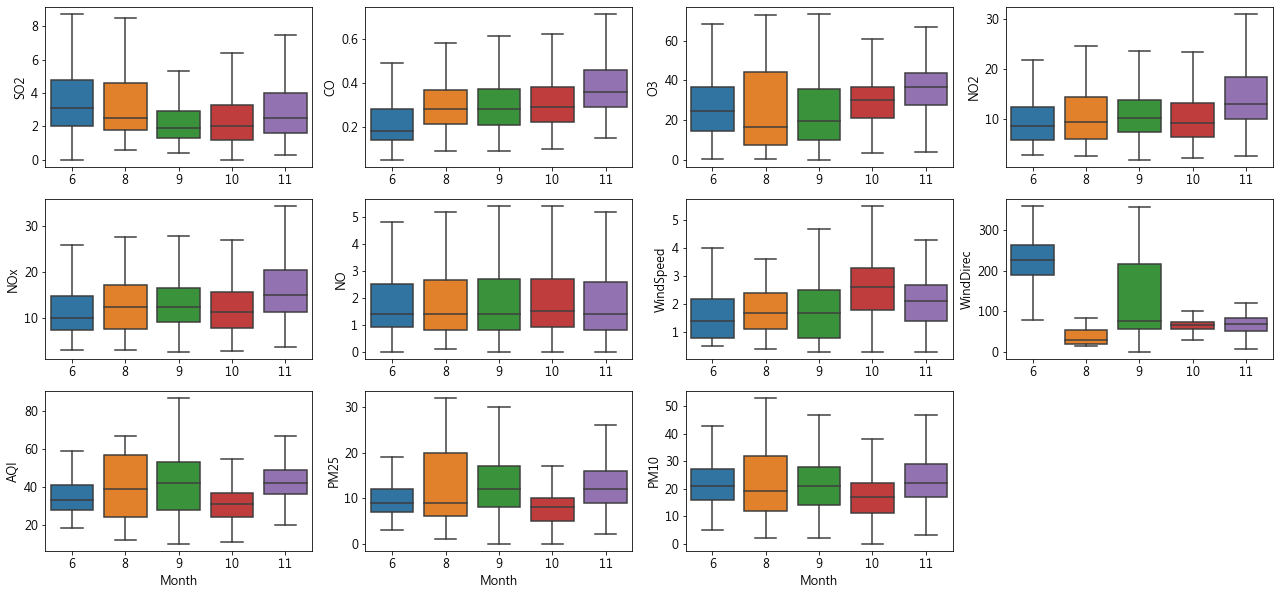

In [82]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 設定字體
plt.rcParams['axes.unicode_minus'] = False                # 用來正常顯示負號
plt.rcParams["figure.figsize"] = (22,10)
plt.rcParams.update({'font.size': 12})
fig,axes=plt.subplots(3,4)
p1 = sns.boxplot(x = "Month", y = "SO2",  data = AQI, showfliers = False, ax = axes[0,0])
p1.set(xlabel=None)
p2 = sns.boxplot(x = "Month", y = "CO",  data = AQI, showfliers = False, ax = axes[0,1])
p2.set(xlabel=None)
p3 = sns.boxplot(x = "Month", y = "O3",  data = AQI, showfliers = False, ax = axes[0,2])
p3.set(xlabel=None)
p4 = sns.boxplot(x = "Month", y = "NO2",  data = AQI, showfliers = False, ax = axes[0,3])
p4.set(xlabel=None)
p5 = sns.boxplot(x = "Month", y = "NOx",  data = AQI, showfliers = False, ax = axes[1,0])
p5.set(xlabel=None)
p6 = sns.boxplot(x = "Month", y = "NO",  data = AQI, showfliers = False, ax = axes[1,1])
p6.set(xlabel=None)
p7 = sns.boxplot(x = "Month", y = "WindSpeed",  data = AQI, showfliers = False, ax = axes[1,2])
p7.set(xlabel=None)
p8 = sns.boxplot(x = "Month", y = "WindDirec",  data = AQI, showfliers = False, ax = axes[1,3])
p8.set(xlabel=None)
sns.boxplot(x = "Month", y = "AQI",  data = AQI, showfliers = False, ax = axes[2,0])
sns.boxplot(x = "Month", y = "PM25",  data = AQI, showfliers = False, ax = axes[2,1])
sns.boxplot(x = "Month", y = "PM10",  data = AQI, showfliers = False, ax = axes[2,2])
plt.axis('off');
plt.savefig('AQI_boxplot.jpg')

In [89]:
if 348.75 <= degrees, degrees <= 360 { windDirection = 'N' } 
else if 0 <= degrees,degrees <= 11.25 { windDirection = 'N' } 
else if 11.25 < degrees, degrees <= 33.75 { windDirection = 'NNE' } 
else if 33.75 < degrees, degrees <= 56.25 { windDirection = 'NE' } 
else if 56.25 < degrees, degrees <= 78.75 { windDirection = 'ENE' } 
else if 78.75 < degrees, degrees <= 101.25 { windDirection = 'E' } 
else if 101.25 < degrees, degrees <= 123.75 { windDirection = 'ESE' } 
else if 123.75 < degrees, degrees <= 146.25 { windDirection = 'SE' } 
else if 146.25 < degrees, degrees <= 168.75 { windDirection = 'SSE' } 
else if 168.75 < degrees, degrees <= 191.25 { windDirection = 'S' } 
else if 191.25 < degrees, degrees <= 213.75 { windDirection = 'SSW' } 
else if 213.75 < degrees, degrees <= 236.25 { windDirection = 'SW' } 
else if 236.25 < degrees, degrees <= 258.75 { windDirection = 'WSW' } 
else if 258.75 < degrees, degrees <= 281.25 { windDirection = 'W' } 
else if 281.25 < degrees, degrees <= 303.75 { windDirection = 'WNW' } 
else if 303.75 < degrees, degrees <= 326.25 { windDirection = 'NW' } 
else if 326.25 < degrees, degrees < 348.75 { windDirection = 'NNW' } 


359.0